# Home Credit - EDA

In [1]:
# import all necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)

## Overview

In [2]:
# load data
df = pd.read_csv("application_train.csv")

In [3]:
# first 5 row
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# dataframe information
pd.DataFrame({'Features': df.columns,
              'dataType': df.dtypes.values,
              'nullvalues': [df[i].isna().sum() for i in df.columns],
              'unique': [df[i].nunique() for i in df.columns],
              'uniqueSample': [list(pd.Series(df[i].unique()))
                               for i in df.columns]}).reset_index(drop=True)

,Features,dataType,nullvalues,unique,uniqueSample
0,SK_ID_CURR,int64,0,307511,"[100002, 100003, 100004, 100006, 100007, 10000..."
1,TARGET,int64,0,2,"[1, 0]"
2,NAME_CONTRACT_TYPE,object,0,2,"[Cash loans, Revolving loans]"
3,CODE_GENDER,object,0,3,"[M, F, XNA]"
4,FLAG_OWN_CAR,object,0,2,"[N, Y]"
...,...,...,...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,float64,41519,9,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 9.0, ..."
118,AMT_REQ_CREDIT_BUREAU_WEEK,float64,41519,9,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 8.0, ..."
119,AMT_REQ_CREDIT_BUREAU_MON,float64,41519,24,"[0.0, nan, 1.0, 2.0, 6.0, 5.0, 3.0, 7.0, 9.0, ..."
120,AMT_REQ_CREDIT_BUREAU_QRT,float64,41519,11,"[0.0, nan, 1.0, 2.0, 4.0, 3.0, 8.0, 5.0, 6.0, ..."


In [5]:
# show shape of the data
df.shape

(307511, 122)

In [6]:
# show columns name
df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [7]:
# show tendency of numerical data
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
df.describe(exclude=["int", "float"]).T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


## Exploratory Data Analysis

### Target Feature

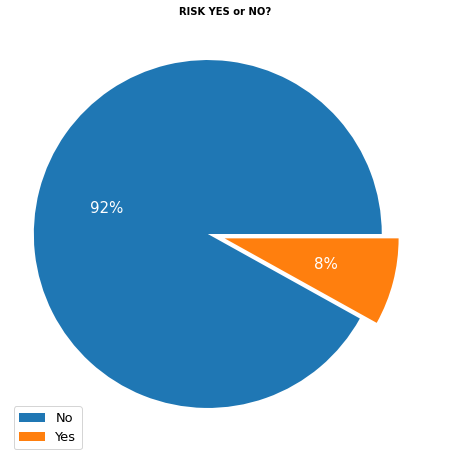

0    282686
1     24825
Name: TARGET, dtype: int64

In [9]:
plt.figure(figsize=(10, 8))
plt.title("RISK YES or NO?", size=10, fontweight='bold')
plt.pie(df['TARGET'].value_counts(), autopct='%.0f%%',
        textprops={'fontsize': 15, 'color': 'white'}, explode=(0.1, 0))
plt.legend(['No', 'Yes'], loc='lower left', fontsize=13)
plt.show()

df['TARGET'].value_counts()

> It can be seen from the chart above that there are 8% (24825) of customers who are at risk of not being able to pay, while those who can pay are as much as 92% (282686).

### Numerical Features

In [10]:
# using a numeric feature that you want to find insights for
df_num = df[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
             'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH',
             'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
             'CNT_FAM_MEMBERS']]

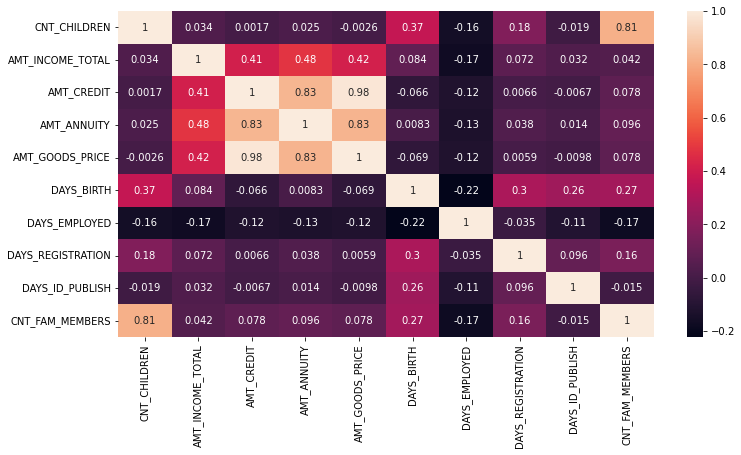

In [11]:
# numerical features - correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_num.corr('spearman'), annot=True)
plt.show()

> Dari korelasi diatas, dapat dilihat terdapat beberapa korelasi kuat antar kolom, yaitu:
> 1. CNT_FAM_MEMBERS dengan CNT_CHILDREN sebesar 0.81
> 2. AMT_ANNUITY dengan AMT_CREDIT sebesar 0.83
> 3. AMT_GOODS_PRICE dengan AMT_CREDIT sebesar 0.98
> 4. AMT_GOODS_PRICE dengan AMT_ANNUITY sebesar 0.83

> Maka dari itu, akan kita cari informasi mengenai korelasi tersebut dengan pairplot

#### CNT_FAM_MEMBERS & CNT_CHILDREN

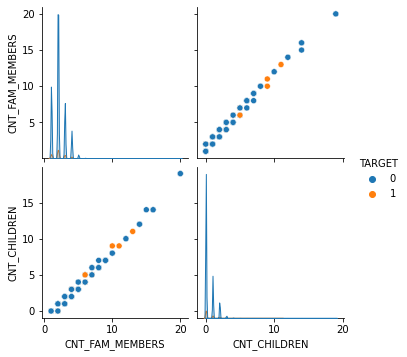

In [12]:
sns.pairplot(df[['CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'TARGET']], hue="TARGET")
plt.show()

> From the pairplot, it can be seen that when a customer has children, the total number of family members also increases. Customers who have a total of 6-13 family members have difficulty making payments.

#### AMT_ANNUITY, AMT_CREDIT, & AMT_GOODS_PRICE

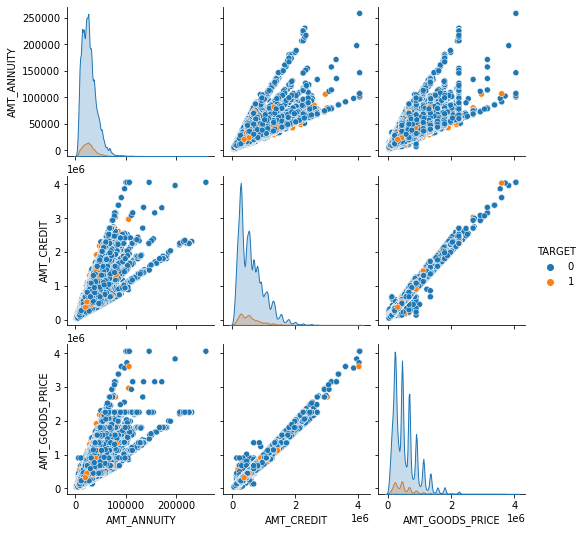

In [13]:
sns.pairplot(df[['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'TARGET']],
             hue="TARGET")
plt.show()

> From the pairplot above, it can be seen that the greater the AMT_ANNUITY, the greater the AMT_CREDIT and AMT_GOODS_PRICE. For the distribution of customers who have difficulty in making payments, they are spread over the various total loans that the customer has. But most customers who cannot pay are customers who have loans under 100000.

In [14]:
# function for visualize the data
def visualize_data(column_name):
    risk = df[(df['TARGET'] == 1)][column_name]
    not_risk = df[(df['TARGET'] == 0)][column_name]

    plt.figure(figsize=(12, 6))
    ax = sns.distplot(risk)
    ax = sns.distplot(not_risk)

    ax.legend(['No', 'Yes'])

    plt.xlabel(column_name, fontsize=12)
    plt.title('Distribution of RISK by ' + column_name, fontsize=22)
    plt.tight_layout()
    plt.show()

    print(f"RISK by {column_name}")
    print(risk.value_counts().head())
    print(f"Not RISK by {column_name}")
    print(not_risk.value_counts().head())

#### AMT_INCOME_TOTAL

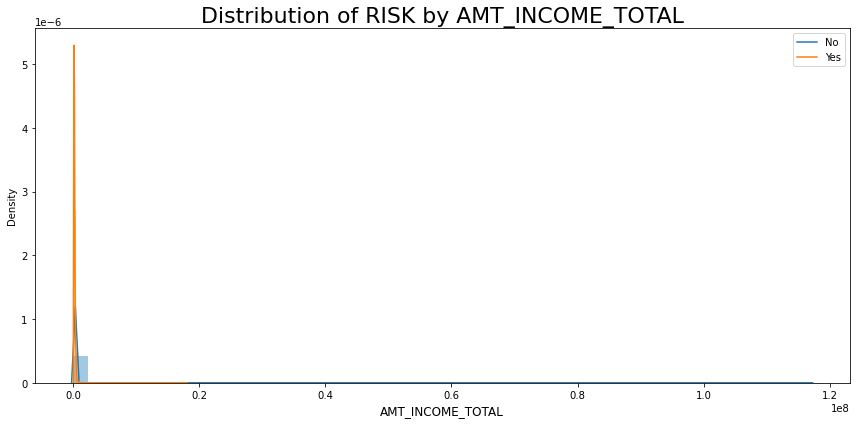

RISK by AMT_INCOME_TOTAL
135000.0    2983
112500.0    2720
157500.0    2307
180000.0    2083
90000.0     1844
Name: AMT_INCOME_TOTAL, dtype: int64
Not RISK by AMT_INCOME_TOTAL
135000.0    32767
112500.0    28299
157500.0    24249
180000.0    22636
90000.0     20639
Name: AMT_INCOME_TOTAL, dtype: int64


In [15]:
visualize_data("AMT_INCOME_TOTAL")

> AMT_INCOME_TOTAL customer has a very large range, so the distribution is described as above. Most customers who do not make payments have income between 90000-157500.

#### DAYS_BIRTH

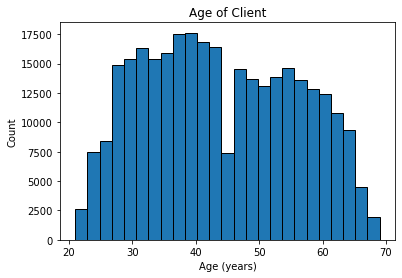

In [16]:
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])

# Plot the distribution of ages in years
df['AGE'] = round(df['DAYS_BIRTH'] / 365)
plt.hist(df['AGE'], edgecolor='k', bins=25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

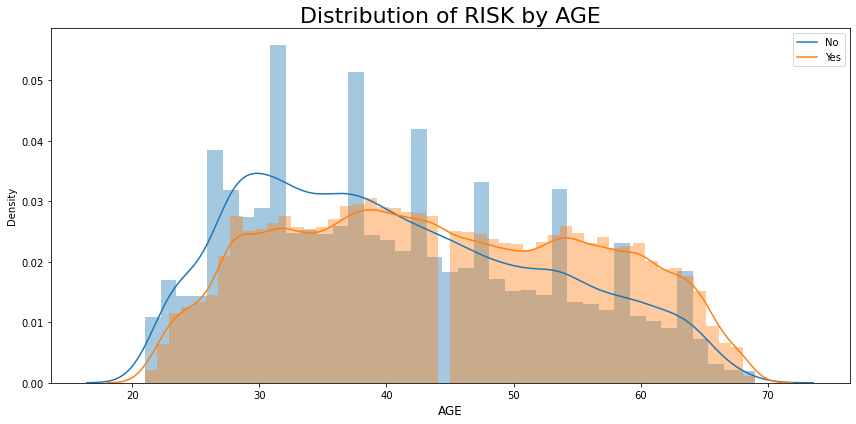

RISK by AGE
28.0    975
30.0    885
32.0    854
31.0    850
29.0    839
Name: AGE, dtype: int64
Not RISK by AGE
39.0    8277
38.0    8024
37.0    7926
40.0    7880
41.0    7828
Name: AGE, dtype: int64


In [17]:
visualize_data("AGE")

> Most of those who do not make payments are customers who are young or under the age of 33. This might be considered for socialization to customers so they can pay according to the terms and make their financial plans better.

#### DAYS_EMPLOYEED

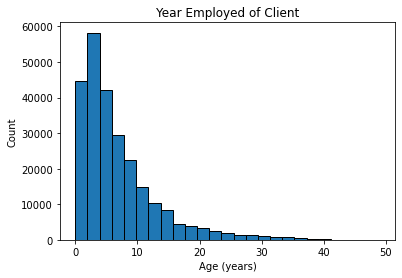

In [18]:
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])

# replace annomaly
df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

# Plot the distribution of days employed in years
df['YEAR_EMPLOYED'] = round(df['DAYS_EMPLOYED'] / 365)
plt.hist(df['YEAR_EMPLOYED'], edgecolor='k', bins=25)
plt.title('Year Employed of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

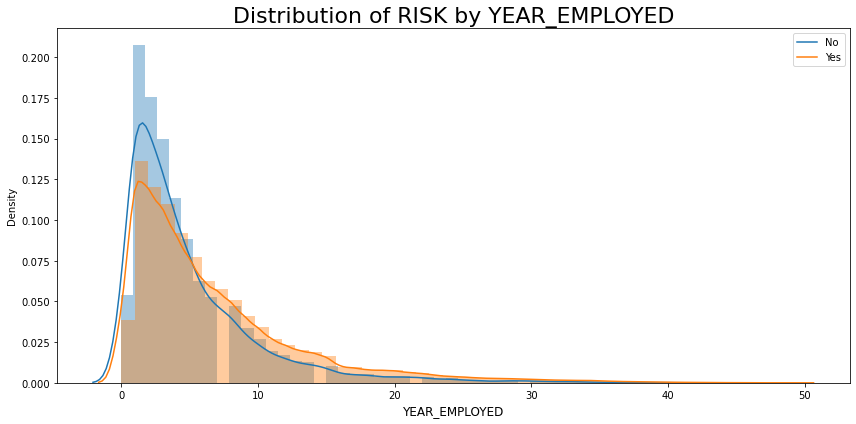

RISK by YEAR_EMPLOYED
1.0    3985
2.0    3372
3.0    2879
4.0    2180
5.0    1696
Name: YEAR_EMPLOYED, dtype: int64
Not RISK by YEAR_EMPLOYED
1.0    30811
2.0    27158
3.0    24842
4.0    20753
5.0    17495
Name: YEAR_EMPLOYED, dtype: int64


In [19]:
visualize_data("YEAR_EMPLOYED")

> The customer's working experience influences making payments, this is also related to the age of the customer, where many young customers cannot make payments due to lack of socialization or poor financial plans.

#### DAYS_REGISTRATION

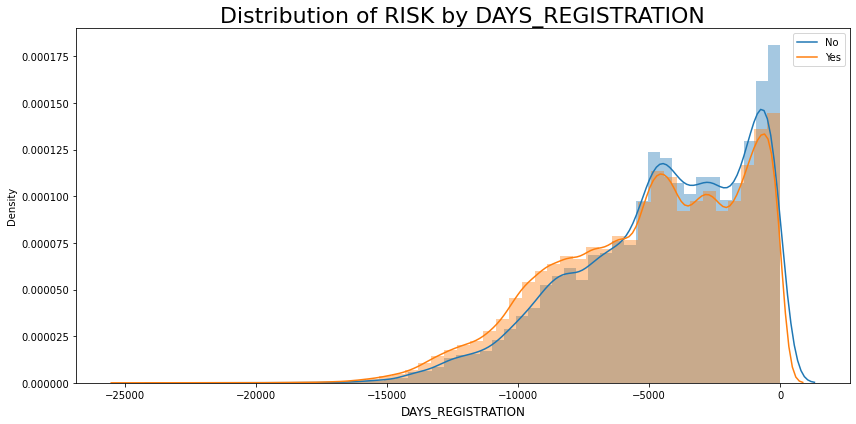

RISK by DAYS_REGISTRATION
-1.0      17
-2.0      16
-10.0     15
-6.0      13
-241.0    12
Name: DAYS_REGISTRATION, dtype: int64
Not RISK by DAYS_REGISTRATION
-1.0    96
-7.0    86
-6.0    83
-4.0    82
-2.0    76
Name: DAYS_REGISTRATION, dtype: int64


In [20]:
visualize_data("DAYS_REGISTRATION")

#### DAYS_ID_PUBLISH

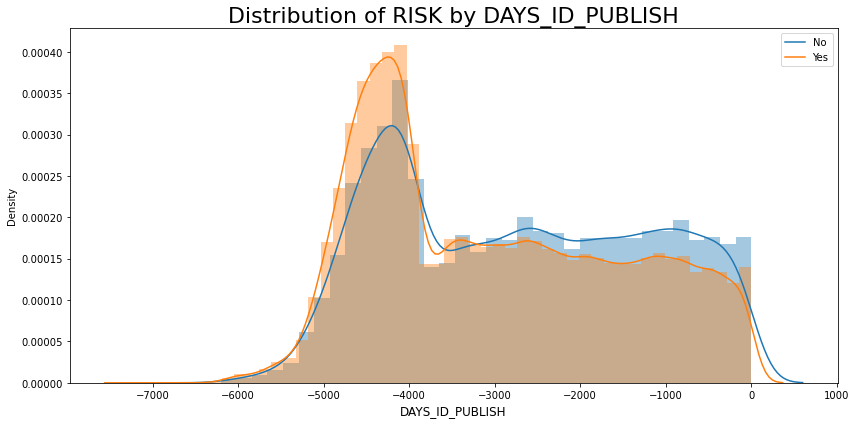

RISK by DAYS_ID_PUBLISH
-4033    20
-4409    17
-4374    17
-4144    16
-4067    16
Name: DAYS_ID_PUBLISH, dtype: int64
Not RISK by DAYS_ID_PUBLISH
-4053    161
-4417    153
-4095    150
-4046    149
-4256    147
Name: DAYS_ID_PUBLISH, dtype: int64


In [21]:
visualize_data("DAYS_ID_PUBLISH")

> Many customers who had a Publish ID between 4000-5000 days ago did not make payments, but after under 4000 days ago, that number dropped dramatically. This might happen because of a new policy or the campaign period has ended, so the number of customers who borrow has decreased.

### Categorical Features

In [22]:
cols = ['NAME_CONTRACT_TYPE',
        'CODE_GENDER',
        'FLAG_OWN_CAR',
        'FLAG_OWN_REALTY',
        'NAME_TYPE_SUITE',
        'NAME_INCOME_TYPE',
        'NAME_EDUCATION_TYPE',
        'NAME_FAMILY_STATUS',
        'NAME_HOUSING_TYPE',
        'OCCUPATION_TYPE',
        'REG_REGION_NOT_LIVE_REGION',
        'REG_REGION_NOT_WORK_REGION',
        'REG_CITY_NOT_LIVE_CITY',
        'REG_CITY_NOT_WORK_CITY',
        'ORGANIZATION_TYPE']

In [23]:
df_ctg = df[cols]

In [24]:
# cramers untuk categorical feature correlation
def cramersv(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))

In [25]:
corr = []
for i in df_ctg:
    matrix = []
    for j in df_ctg:
        matrix.append(cramersv(df_ctg[i], df_ctg[j]))
    corr.append(matrix)

corr_cat = pd.DataFrame(corr, index=df_ctg.columns, columns=df_ctg.columns)

<AxesSubplot:>

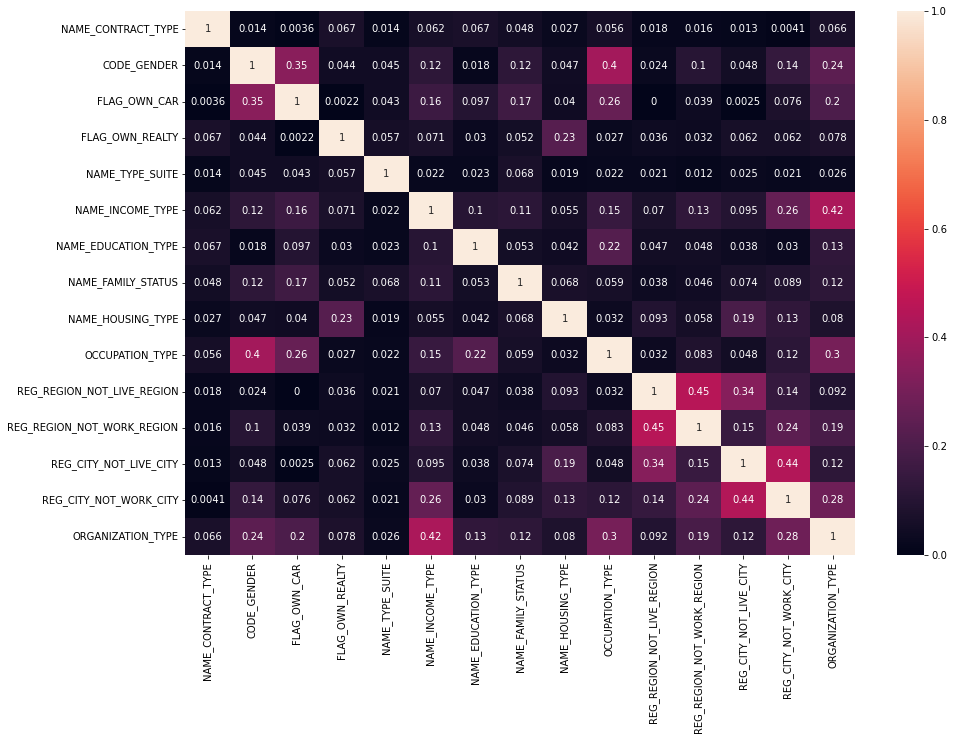

In [26]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_cat, annot=True)

> The heatmap correlation above shows that there are several columns that have relationships, namely
> 1. FLAG_OWN_CAR with CODE_GENDER of 0.4
> 2. OCCUPATION_TYPE with CODE_GENDER of 0.4
> 3. REG_REGION_NOT_WORK_REGION with REG_REGION_NOT_LIVE_REGION of 0.45
> 4. REG_CITY_NOT_WORK_CITY with REG_CITY_NOT_LIVE_CITY of 0.44
> 5. ORGANIZATION_TYPE with NAME_INCOME_TYPE of 0.42

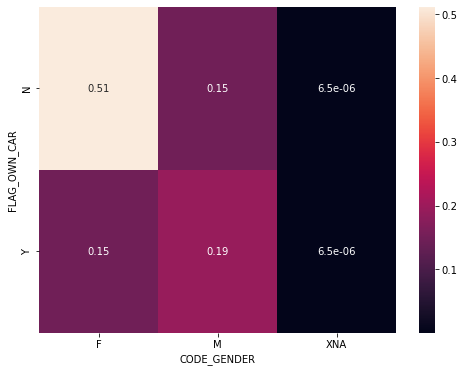

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df['FLAG_OWN_CAR'], df['CODE_GENDER'], normalize=True),
            annot=True)
plt.show()

> Half of the customers are female and do not own a car.

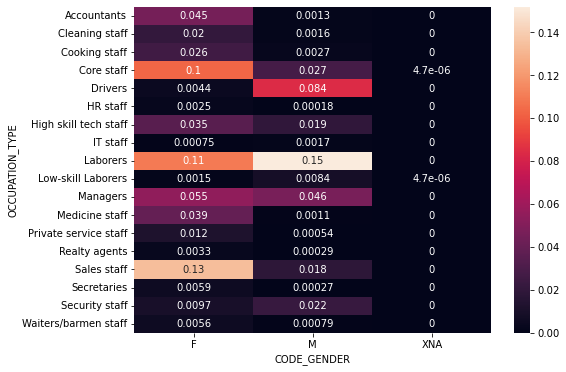

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df['OCCUPATION_TYPE'], df['CODE_GENDER'], normalize=True),
            annot=True)
plt.show()

> The most male customers have jobs as Laborers, while the most female customers have jobs as Sales Staff.

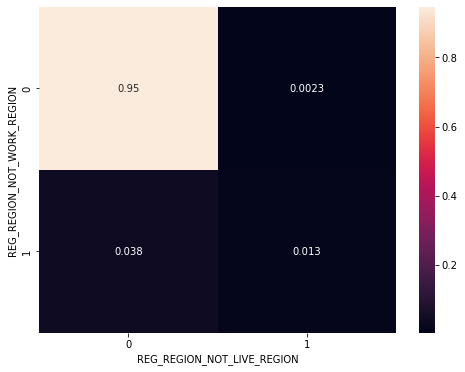

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df['REG_REGION_NOT_WORK_REGION'], df['REG_REGION_NOT_LIVE_REGION'], normalize=True),
            annot=True)
plt.show()

> 95% of customers have a permanent address in the same region as the contact and place of work.

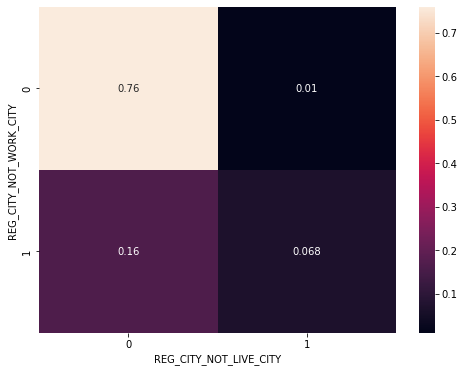

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df['REG_CITY_NOT_WORK_CITY'], df['REG_CITY_NOT_LIVE_CITY'], normalize=True),
            annot=True)
plt.show()

> 76% of customers have a permanent address the same city as contact and place of work.

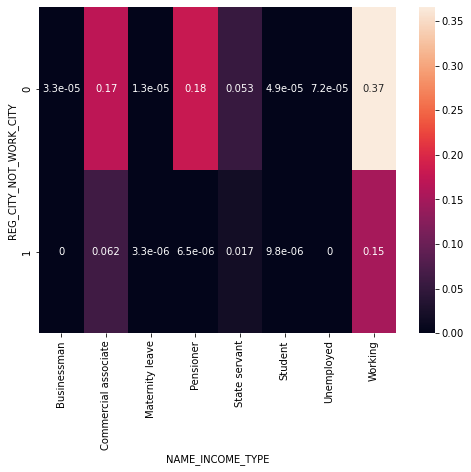

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df['REG_CITY_NOT_WORK_CITY'], df['NAME_INCOME_TYPE'], normalize=True),
            annot=True)
plt.show()

> As many as 0.37% of customers who work in the same city as their permanent residence have a job.

In [32]:
def visualize_ctg_data(column_name):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column_name, data=df, hue='TARGET')
    plt.legend(loc='upper right', fontsize=13)
    plt.xlabel(column_name, fontsize=20)
    plt.xticks(rotation=35)
    plt.tight_layout
    plt.show()

    print(pd.crosstab(df[column_name], df['TARGET'], normalize=True))

#### NAME_CONTRACT_TYPE

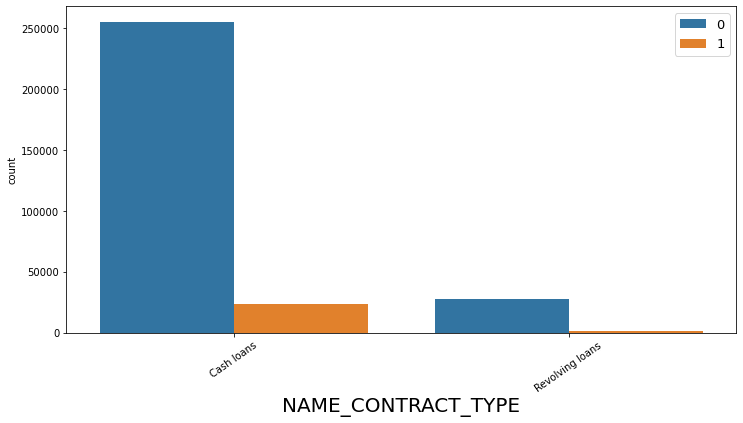

TARGET                     0         1
NAME_CONTRACT_TYPE                    
Cash loans          0.829274  0.075513
Revolving loans     0.089997  0.005216


In [33]:
visualize_ctg_data("NAME_CONTRACT_TYPE")

> Cash loans are the type of contract that most customers take, this can happen because cash loans will send money directly to the customer's account for things submitted, for example for mortgages. Meanwhile, revolving loans are intended for business capital loans, so that fewer people have this type of loan. As many as 90% of customers take this type of contract and there are 8% of customers from this type of cash loan agreement who do not make payments.

#### CODE_GENDER

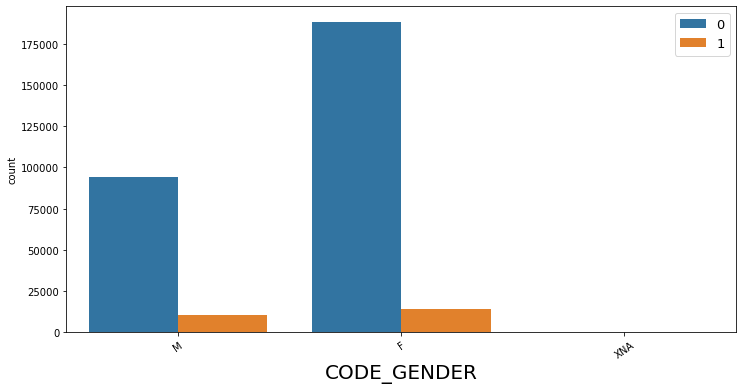

TARGET              0         1
CODE_GENDER                    
F            0.612264  0.046080
M            0.306994  0.034649
XNA          0.000013  0.000000


In [34]:
visualize_ctg_data("CODE_GENDER")

> Most of the customers who make loans come from female customers, but when compared to male customers, it is male customers who do not make payments relatively large compared to female customers.

#### NAME_TYPE_SUIT & NAME_FAMILY_STATUS

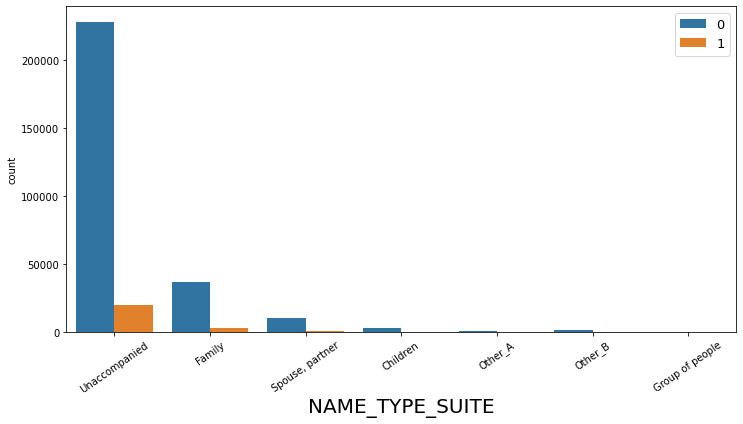

TARGET                  0         1
NAME_TYPE_SUITE                    
Children         0.009882  0.000787
Family           0.121286  0.009826
Group of people  0.000810  0.000075
Other_A          0.002580  0.000248
Other_B          0.005212  0.000568
Spouse, partner  0.034208  0.002923
Unaccompanied    0.745182  0.066413


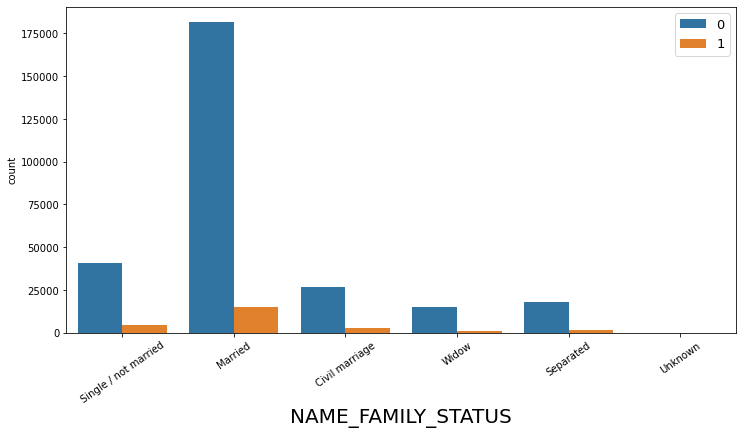

TARGET                       0         1
NAME_FAMILY_STATUS                      
Civil marriage        0.087197  0.009629
Married               0.590489  0.048291
Separated             0.059022  0.005268
Single / not married  0.133286  0.014494
Unknown               0.000007  0.000000
Widow                 0.049270  0.003047


In [35]:
visualize_ctg_data("NAME_TYPE_SUITE")
visualize_ctg_data("NAME_FAMILY_STATUS")

> Most of the customers are married, but when applying for a loan, most of the customers go alone to register. Maybe they have already searched for information and discussed it beforehand, so that when registering a loan, they can apply for a loan themselves.

#### FLAG_OWN_CAR & FLAG_OWN_RELTY

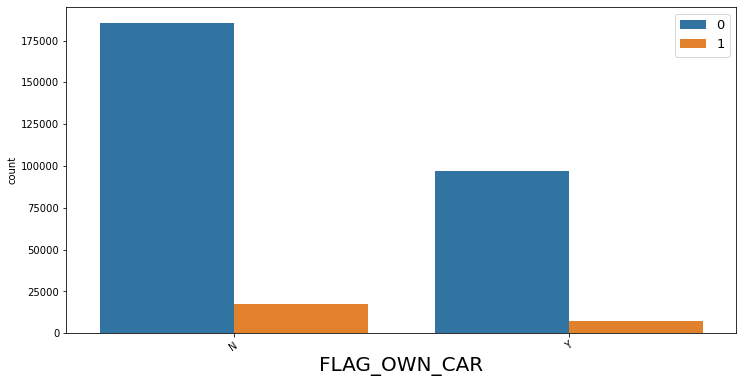

TARGET               0         1
FLAG_OWN_CAR                    
N             0.603800  0.056092
Y             0.315472  0.024637


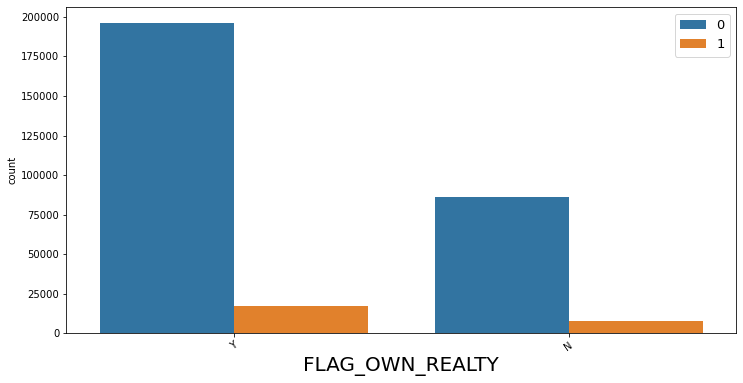

TARGET                  0         1
FLAG_OWN_REALTY                    
N                0.280826  0.025502
Y                0.638445  0.055227


In [36]:
visualize_ctg_data("FLAG_OWN_CAR")
visualize_ctg_data("FLAG_OWN_REALTY")

> Most customers own a house, but there are still many who don't own a car. This may be related to family status, where most borrowers are married and usually someone with a family is more likely to think about getting a permanent residence first compared to a vehicle.

#### NAME_INCOME_TYPE, OCCUPAATION_TYPE, NAME_EDUCATION_TYPE, & ORGANIZATIONAL_TYPE

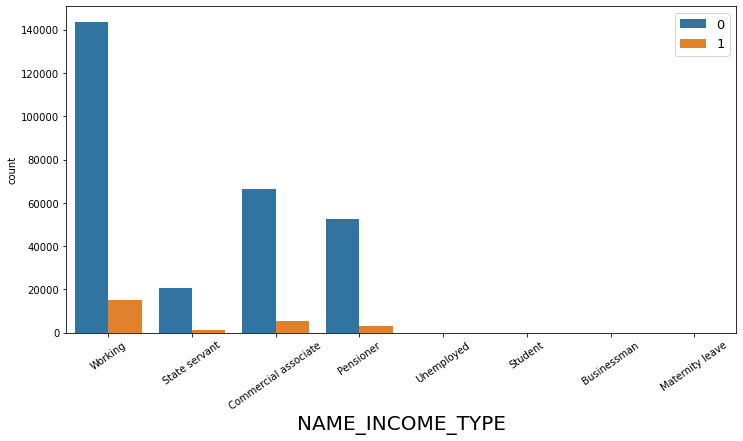

TARGET                       0         1
NAME_INCOME_TYPE                        
Businessman           0.000033  0.000000
Commercial associate  0.215462  0.017430
Maternity leave       0.000010  0.000007
Pensioner             0.170335  0.009697
State servant         0.066515  0.004062
Student               0.000059  0.000000
Unemployed            0.000046  0.000026
Working               0.466813  0.049507


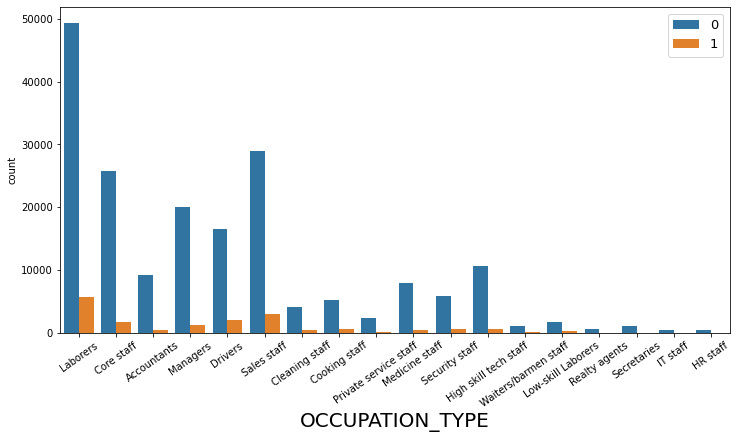

TARGET                        0         1
OCCUPATION_TYPE                          
Accountants            0.044236  0.002245
Cleaning staff         0.019922  0.002117
Cooking staff          0.025223  0.002941
Core staff             0.122357  0.008232
Drivers                0.078136  0.009980
HR staff               0.002496  0.000171
High skill tech staff  0.050583  0.003320
IT staff               0.002330  0.000161
Laborers               0.233744  0.027653
Low-skill Laborers     0.008213  0.001700
Managers               0.094937  0.006290
Medicine staff         0.037727  0.002709
Private service staff  0.011733  0.000829
Realty agents          0.003278  0.000279
Sales staff            0.137410  0.014646
Secretaries            0.005746  0.000436
Security staff         0.028415  0.003420
Waiters/barmen staff   0.005665  0.000720


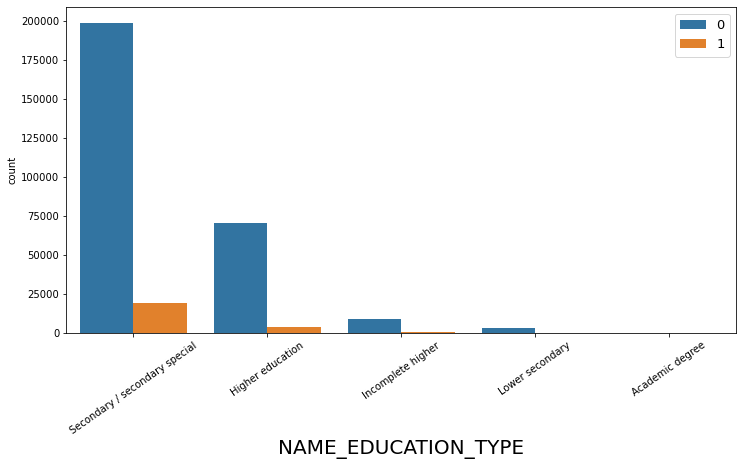

TARGET                                0         1
NAME_EDUCATION_TYPE                              
Academic degree                0.000524  0.000010
Higher education               0.230411  0.013037
Incomplete higher              0.030584  0.002836
Lower secondary                0.011053  0.001356
Secondary / secondary special  0.646699  0.063490


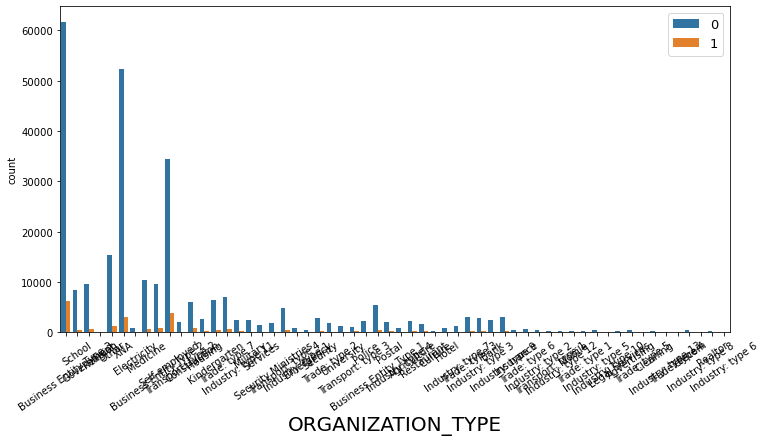

TARGET                         0         1
ORGANIZATION_TYPE                         
Advertising             0.001281  0.000114
Agriculture             0.007144  0.000836
Bank                    0.007730  0.000423
Business Entity Type 1  0.017876  0.001584
Business Entity Type 2  0.031391  0.002927
Business Entity Type 3  0.200542  0.020562
Cleaning                0.000751  0.000094
Construction            0.019303  0.002553
Culture                 0.001164  0.000068
Electricity             0.002884  0.000205
Emergency               0.001691  0.000130
Government              0.031472  0.002361
Hotel                   0.002940  0.000202
Housing                 0.008855  0.000764
Industry: type 1        0.003005  0.000374
Industry: type 10       0.000332  0.000023
Industry: type 11       0.008032  0.000761
Industry: type 12       0.001154  0.000046
Industry: type 13       0.000189  0.000029
Industry: type 2        0.001382  0.000107
Industry: type 3        0.009528  0.001132
Industry: t

In [37]:
visualize_ctg_data("NAME_INCOME_TYPE")
visualize_ctg_data("OCCUPATION_TYPE")
visualize_ctg_data("NAME_EDUCATION_TYPE")
visualize_ctg_data("ORGANIZATION_TYPE")

> More than half of customers with secondary education have income from working as laborers and as many as 20% of customers have jobs in Type 3 Business Entities. This may be due to a lack of adequate education, so most customers work as laborers and need loans to meet their needs, like buying a house.

#### REG_REGION_NOT_LIVE_REGION & REG_REGION_NOT_WORK_REGION

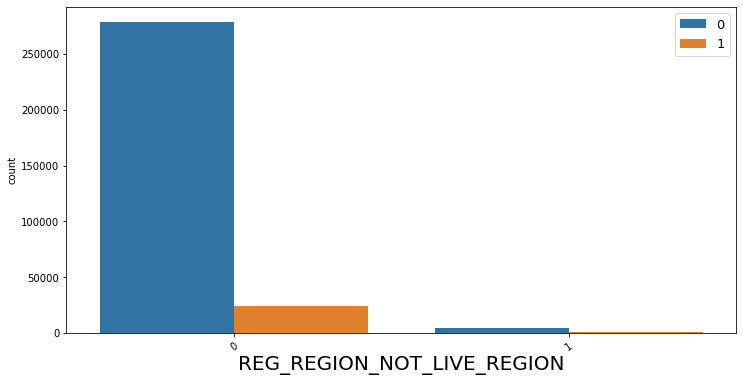

TARGET                             0         1
REG_REGION_NOT_LIVE_REGION                    
0                           0.905535  0.079321
1                           0.013736  0.001408


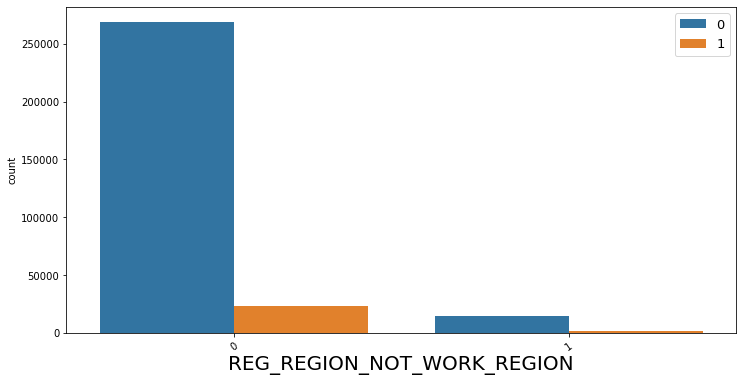

TARGET                             0         1
REG_REGION_NOT_WORK_REGION                    
0                           0.873016  0.076215
1                           0.046255  0.004514


In [38]:
visualize_ctg_data("REG_REGION_NOT_LIVE_REGION")
visualize_ctg_data("REG_REGION_NOT_WORK_REGION")

> Almost all registered customer region addresses are in accordance with where the customer lives and works.

#### REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, & NAME_HOUSING_TYPE

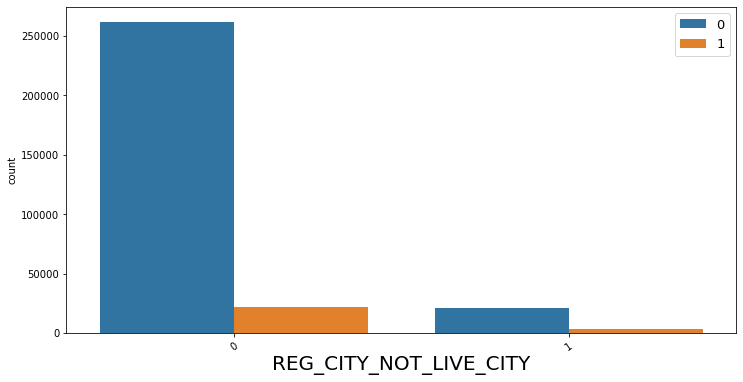

TARGET                         0         1
REG_CITY_NOT_LIVE_CITY                    
0                       0.850656  0.071171
1                       0.068615  0.009557


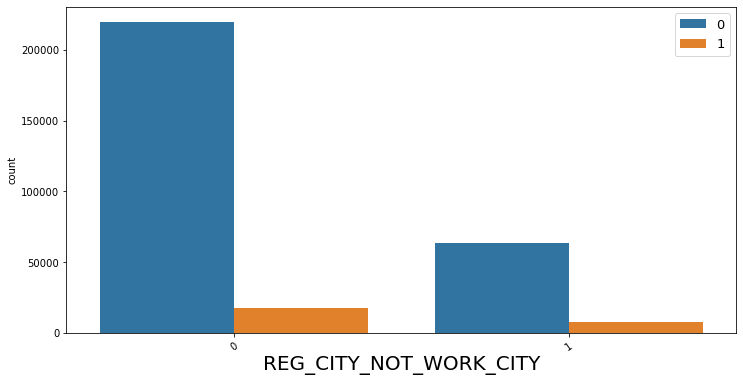

TARGET                         0         1
REG_CITY_NOT_WORK_CITY                    
0                       0.713272  0.056274
1                       0.205999  0.024454


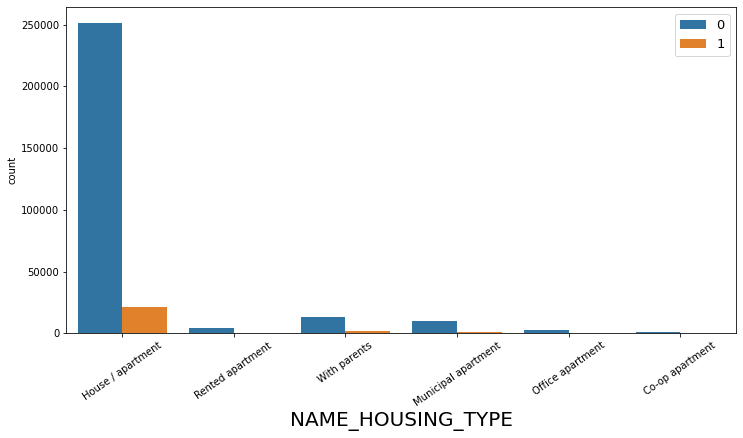

TARGET                      0         1
NAME_HOUSING_TYPE                      
Co-op apartment      0.003359  0.000289
House / apartment    0.818169  0.069175
Municipal apartment  0.033261  0.003106
Office apartment     0.007951  0.000559
Rented apartment     0.013918  0.001954
With parents         0.042613  0.005645


In [39]:
visualize_ctg_data("REG_CITY_NOT_LIVE_CITY")
visualize_ctg_data("REG_CITY_NOT_WORK_CITY")
visualize_ctg_data("NAME_HOUSING_TYPE")

> Almost all of the customer's city addresses listed correspond to the customer's place of residence and place of work. And most of the customers own houses/apartments compared to other types of residences. This may be related to family status, where many customers are married, so they tend to choose to buy a house/apartment compared to other types of houses.

## Summary

1. As many as 65% of customers are female customers, and 50% of the total female customers do not own a car.

2. Most of the customers who applied for loans (64%) were married. Customers who are married and have a total family of 6-13 family members are more likely to have difficulty making payments because they have many other needs or lack good financial planning.

3. Customers have varying ages, but most are customers aged 30-40 years, so most of their work experience is between 0-10 years. Most of the customers also only have secondary education, so many of them have income from working as laborers who have an income between 90000 - 180000.

4. The customer's place of residence is almost entirely the same as the region and city where they work. Their type of residence is a house or apartment. This might happen because most of the customer's family status is married, so they will prioritize their residence first compared to other things, such as a car.

## Preprocessing

### Correlation

In [40]:
correlations = df.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(20))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OBS_60_CNT_SOCIAL_CIRCLE       0.009022
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.15

In [41]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = df.corr().abs()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))

There are 36 columns to remove.


In [42]:
to_drop

['AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'AGE',
 'YEAR_EMPLOYED']

In [43]:
to_drop = ['AMT_GOODS_PRICE',
           'REGION_RATING_CLIENT_W_CITY',
           'LIVINGAPARTMENTS_AVG',
           'LIVINGAREA_AVG',
           'APARTMENTS_MODE',
           'BASEMENTAREA_MODE',
           'YEARS_BEGINEXPLUATATION_MODE',
           'YEARS_BUILD_MODE',
           'COMMONAREA_MODE',
           'ELEVATORS_MODE',
           'ENTRANCES_MODE',
           'FLOORSMAX_MODE',
           'FLOORSMIN_MODE',
           'LANDAREA_MODE',
           'LIVINGAPARTMENTS_MODE',
           'LIVINGAREA_MODE',
           'NONLIVINGAPARTMENTS_MODE',
           'NONLIVINGAREA_MODE',
           'APARTMENTS_MEDI',
           'BASEMENTAREA_MEDI',
           'YEARS_BEGINEXPLUATATION_MEDI',
           'YEARS_BUILD_MEDI',
           'COMMONAREA_MEDI',
           'ELEVATORS_MEDI',
           'ENTRANCES_MEDI',
           'FLOORSMAX_MEDI',
           'FLOORSMIN_MEDI',
           'LANDAREA_MEDI',
           'LIVINGAPARTMENTS_MEDI',
           'LIVINGAREA_MEDI',
           'NONLIVINGAPARTMENTS_MEDI',
           'NONLIVINGAREA_MEDI',
           'TOTALAREA_MODE',
           'OBS_60_CNT_SOCIAL_CIRCLE',
           'AGE',
           'YEAR_EMPLOYED']

In [44]:
print('Training shape: ', df.shape)
df = df.drop(columns=to_drop)
print('New Training shape: ', df.shape)

Training shape:  (307511, 124)
New Training shape:  (307511, 88)


### Missing Values

#####  Search missing value

In [45]:
def missing_values_table(df):
    # total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" +
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # return the dataframe with missing information
    return mis_val_table_ren_columns

In [46]:
missing_values = missing_values_table(df)
missing_values.head(10)

Your selected dataframe has 88 columns.
There are 35 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
FLOORSMIN_AVG,208642,67.8
YEARS_BUILD_AVG,204488,66.5
OWN_CAR_AGE,202929,66.0
LANDAREA_AVG,182590,59.4
BASEMENTAREA_AVG,179943,58.5
EXT_SOURCE_1,173378,56.4
NONLIVINGAREA_AVG,169682,55.2


In [47]:
# search missing value in numerical data
numeric_vars = missing_values_table(df.select_dtypes(exclude=object))
numeric_vars = numeric_vars.index.tolist()
numeric_vars

Your selected dataframe has 72 columns.
There are 29 columns that have missing values.


['COMMONAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_AVG',
 'BASEMENTAREA_AVG',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_AVG',
 'ELEVATORS_AVG',
 'APARTMENTS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'EXT_SOURCE_3',
 'DAYS_EMPLOYED',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE']

In [48]:
# search missing value in categorical data
categorical_vars = missing_values_table(df.select_dtypes(exclude=['int', 'float']))
categorical_vars = categorical_vars.index.tolist()
categorical_vars

Your selected dataframe has 16 columns.
There are 6 columns that have missing values.


['FONDKAPREMONT_MODE',
 'WALLSMATERIAL_MODE',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE',
 'OCCUPATION_TYPE',
 'NAME_TYPE_SUITE']

##### Fill missing value in numerical feature

In [49]:
# fill missing value with median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[numeric_vars] = imputer.fit_transform(df[numeric_vars])
df[numeric_vars].head()

,COMMONAREA_AVG,NONLIVINGAPARTMENTS_AVG,FLOORSMIN_AVG,YEARS_BUILD_AVG,OWN_CAR_AGE,LANDAREA_AVG,BASEMENTAREA_AVG,EXT_SOURCE_1,NONLIVINGAREA_AVG,ELEVATORS_AVG,APARTMENTS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_AVG,EXT_SOURCE_3,DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_YEAR,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
0,0.0143,0.0000,0.1250,0.6192,9.0,0.0369,0.0369,0.083037,0.0000,0.00,0.0247,0.0690,0.0833,0.9722,0.139376,637.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.262949,24700.5,1.0,-1134.0
1,0.0605,0.0039,0.3333,0.7960,9.0,0.0130,0.0529,0.311267,0.0098,0.08,0.0959,0.0345,0.2917,0.9851,0.535276,1188.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.622246,35698.5,2.0,-828.0
2,0.0211,0.0000,0.2083,0.7552,26.0,0.0481,0.0763,0.505998,0.0036,0.00,0.0876,0.1379,0.1667,0.9816,0.729567,225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.555912,6750.0,1.0,-815.0
3,0.0211,0.0000,0.2083,0.7552,9.0,0.0481,0.0763,0.505998,0.0036,0.00,0.0876,0.1379,0.1667,0.9816,0.535276,3039.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.650442,29686.5,2.0,-617.0
4,0.0211,0.0000,0.2083,0.7552,9.0,0.0481,0.0763,0.505998,0.0036,0.00,0.0876,0.1379,0.1667,0.9816,0.535276,3038.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322738,21865.5,1.0,-1106.0


In [50]:
df[numeric_vars].isna().sum()

COMMONAREA_AVG                 0
NONLIVINGAPARTMENTS_AVG        0
FLOORSMIN_AVG                  0
YEARS_BUILD_AVG                0
OWN_CAR_AGE                    0
LANDAREA_AVG                   0
BASEMENTAREA_AVG               0
EXT_SOURCE_1                   0
NONLIVINGAREA_AVG              0
ELEVATORS_AVG                  0
APARTMENTS_AVG                 0
ENTRANCES_AVG                  0
FLOORSMAX_AVG                  0
YEARS_BEGINEXPLUATATION_AVG    0
EXT_SOURCE_3                   0
DAYS_EMPLOYED                  0
AMT_REQ_CREDIT_BUREAU_HOUR     0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_QRT      0
AMT_REQ_CREDIT_BUREAU_WEEK     0
AMT_REQ_CREDIT_BUREAU_DAY      0
AMT_REQ_CREDIT_BUREAU_YEAR     0
DEF_60_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_30_CNT_SOCIAL_CIRCLE       0
EXT_SOURCE_2                   0
AMT_ANNUITY                    0
CNT_FAM_MEMBERS                0
DAYS_LAST_PHONE_CHANGE         0
dtype: int64

##### Fill missing value in categorical feature

In [51]:
# fill missing value with mode
for i in categorical_vars:
    print(f'the {i} will be filled with value:', df[i].mode().loc[0])
    df[i].fillna(df[i].mode().loc[0], inplace=True)

the FONDKAPREMONT_MODE will be filled with value: reg oper account
the WALLSMATERIAL_MODE will be filled with value: Panel
the HOUSETYPE_MODE will be filled with value: block of flats
the EMERGENCYSTATE_MODE will be filled with value: No
the OCCUPATION_TYPE will be filled with value: Laborers
the NAME_TYPE_SUITE will be filled with value: Unaccompanied


In [52]:
df[categorical_vars].isna().sum()

FONDKAPREMONT_MODE     0
WALLSMATERIAL_MODE     0
HOUSETYPE_MODE         0
EMERGENCYSTATE_MODE    0
OCCUPATION_TYPE        0
NAME_TYPE_SUITE        0
dtype: int64

### Encoding

In [53]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 2:
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            df[col] = le.transform(df[col])

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


In [54]:
# one-hot encoding of categorical variables
df = pd.get_dummies(df)

print('Features shape: ', df.shape)

Features shape:  (307511, 208)


## Save Data

In [55]:
df.to_csv('clean_data.csv', index=False)